Car Sales in Mexico

In [292]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns

# URL from Excel file
url_InegiCars = "https://www.inegi.org.mx/contenidos/datosprimarios/iavl/tabulados/8_Ventas_serie.xlsx"

# Read file from url 
df_CarsMex = pd.read_excel(url_InegiCars, header=5)  
last_row = df_CarsMex.iloc[-5]

# Print the data 
print(df_CarsMex.head())
print(last_row)

                            Tema     Año    Mes  Marca         Modelo  \
0  Venta al público de vehículos  2005.0  Enero  Acura            Mdx   
1  Venta al público de vehículos  2005.0  Enero  Acura             Rl   
2  Venta al público de vehículos  2005.0  Enero  Acura        Tl 3.5l   
3  Venta al público de vehículos  2005.0  Enero   Audi             A3   
4  Venta al público de vehículos  2005.0  Enero   Audi  A4 1.8 Cabrio   

               Tipo Segmento     Origen     País origen Cantidad  
0  Camiones ligeros    SUV's  Importado          Canadá       18  
1       Automóviles  De Lujo  Importado           Japón        4  
2       Automóviles  De Lujo  Importado  Estados Unidos       38  
3       Automóviles  De Lujo  Importado          Brasil       74  
4       Automóviles  De Lujo  Importado        Alemania        9  
Tema           Venta al publico de vehículos
Año                                   2024.0
Mes                                    Marzo
Marca                   

In [294]:
# Convert "Cantidad" column into numeric
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce')

# Group the data by segments
sum_by_segment = df_CarsMex.groupby('Segmento')['Cantidad'].sum()
print(sum_by_segment)

Segmento
Compactos       4984017.0
De Lujo          917018.0
Deportivos       157846.0
Minivans         438385.0
Pick Ups        3534207.0
SUV's           5100065.0
Subcompactos    6949016.0
Name: Cantidad, dtype: float64


{2019: Segmento
Compactos       261733.0
De Lujo          47156.0
Deportivos        7667.0
Minivans         16952.0
Pick Ups        193536.0
SUV's           343650.0
Subcompactos    447237.0
Name: Cantidad, dtype: float64, 2020: Segmento
Compactos       210929.0
De Lujo          31249.0
Deportivos        5674.0
Minivans          9916.0
Pick Ups        155411.0
SUV's           252303.0
Subcompactos    284581.0
Name: Cantidad, dtype: float64, 2021: Segmento
Compactos       202332.0
De Lujo          28655.0
Deportivos        5276.0
Minivans         14664.0
Pick Ups        161438.0
SUV's           318521.0
Subcompactos    283849.0
Name: Cantidad, dtype: float64, 2022: Segmento
Compactos       213032.0
De Lujo          30142.0
Deportivos        4917.0
Minivans         24076.0
Pick Ups        189732.0
SUV's           393958.0
Subcompactos    238871.0
Name: Cantidad, dtype: float64, 2023: Segmento
Compactos       276597.0
De Lujo          35083.0
Deportivos        6017.0
Minivans         2505

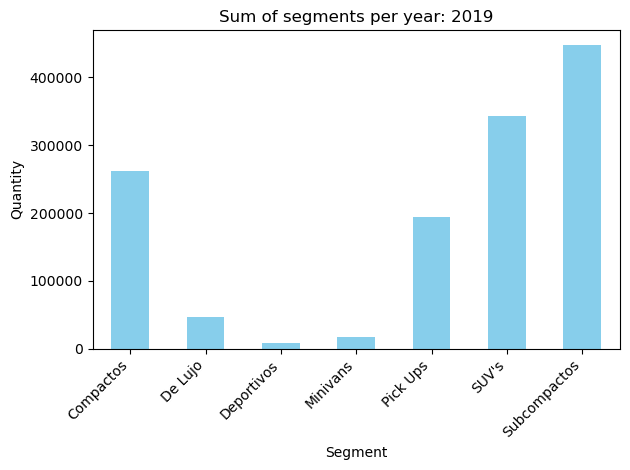

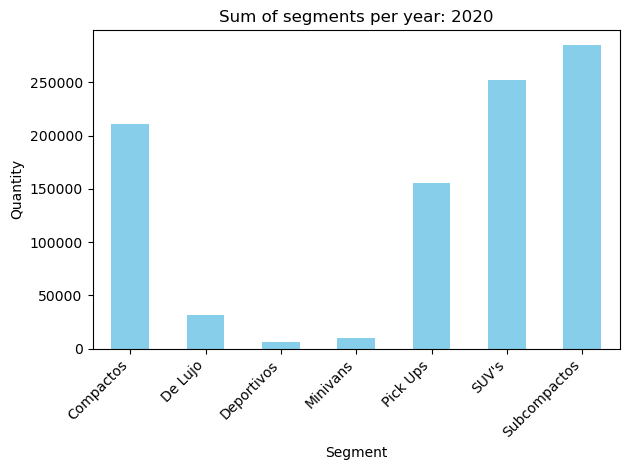

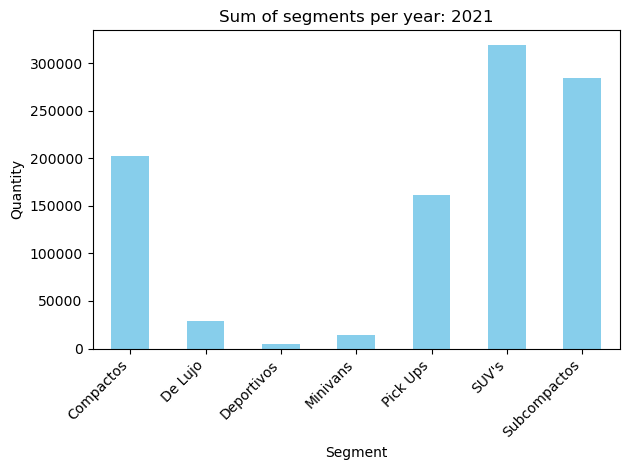

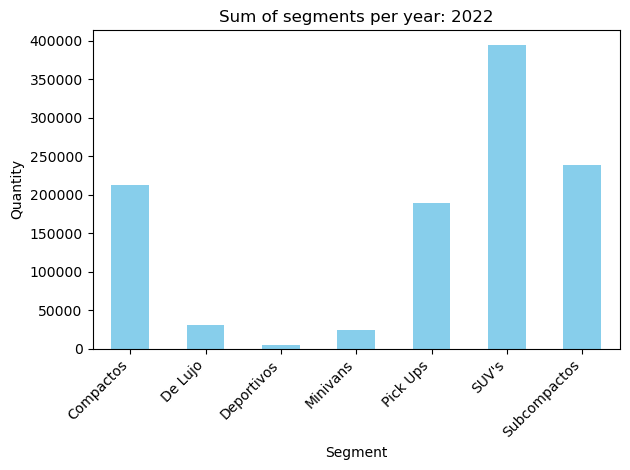

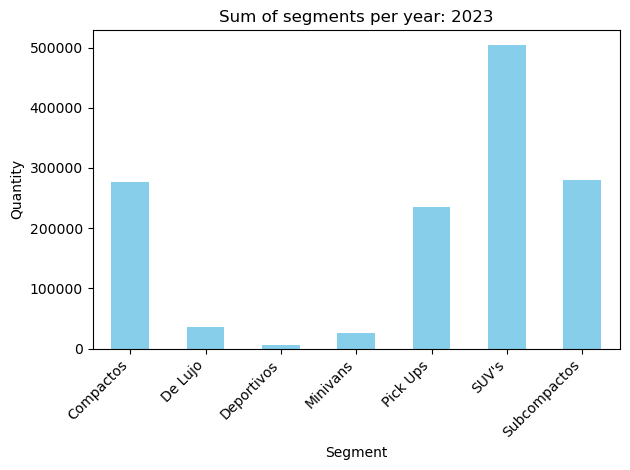

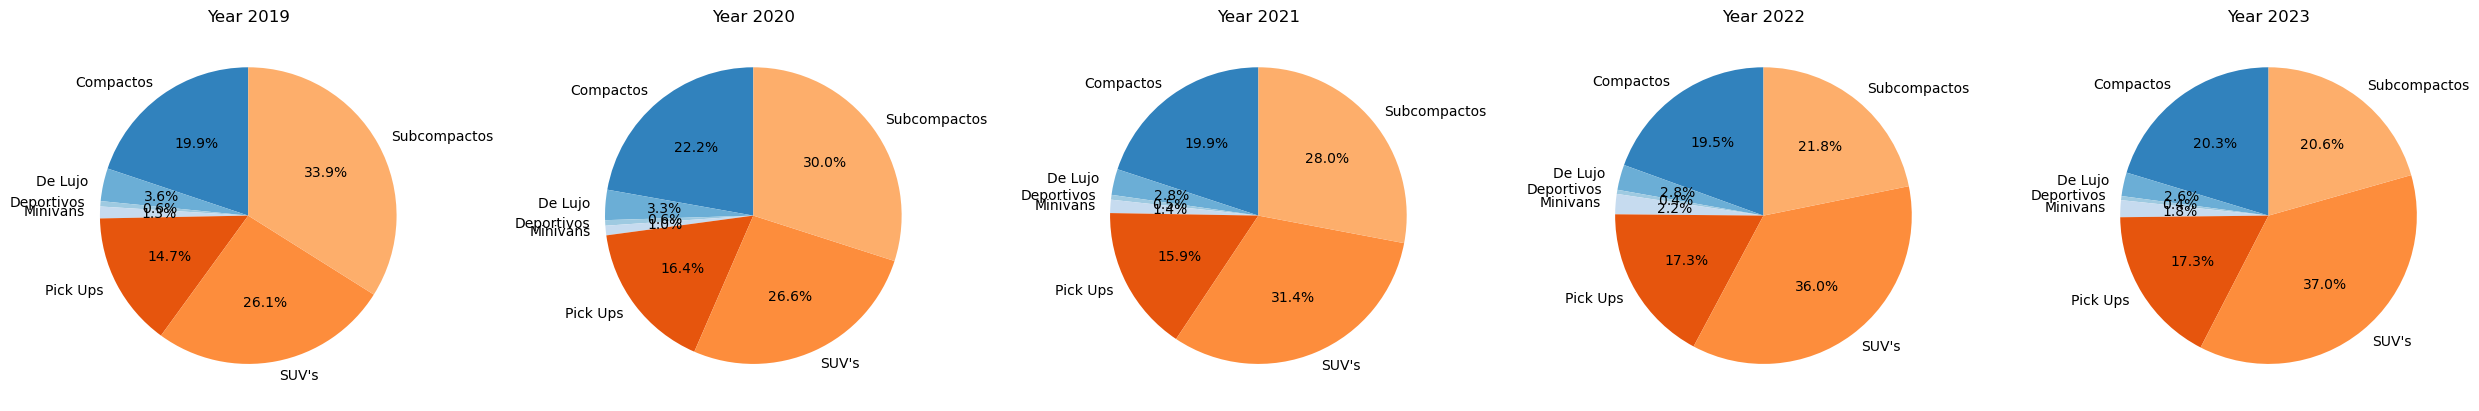

In [295]:
# Interest years
interest_years = [2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store volume by selected years
volume_by_year = {}

# Iterate over the interest years
for year in interest_years:
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    
    # Group by segments
    segment_count_year = year_data.groupby('Segmento')['Cantidad'].sum()
    volume_by_year[year] = segment_count_year

print(volume_by_year)

# Create a bar chart for each year
for year, segment_count_year in volume_by_year.items():
    plt.figure()
    segment_count_year.plot(kind='bar', color='skyblue')
    plt.title(f'Sum of segments per year: {year}')
    plt.xlabel('Segment')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

# Create the chart
plt.figure(figsize=(25, 6))

# Iterate over the years and create pie charts
for year, segment_count_year in volume_by_year.items():
    plt.subplot(1, len(interest_years), list(volume_by_year.keys()).index(year) + 1)
    plt.pie(segment_count_year, labels=segment_count_year.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Year {year}')

# Adjust spaces between the pie charts
plt.tight_layout()

# Show the charts
plt.show()

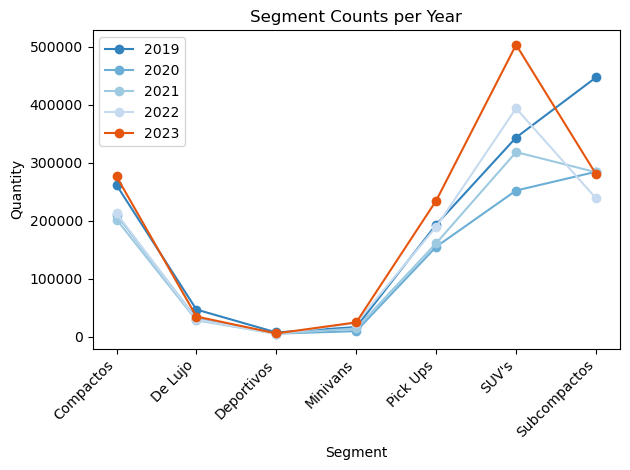

In [299]:
# Iterate over the years and plot segment counts
for year, segment_count_year in volume_by_year.items():
    plt.plot(segment_count_year.index, segment_count_year.values, label=str(year), marker='o')

# Add title and axis labels
plt.title('Segment Counts per Year')
plt.xlabel('Segment')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [301]:
# Interest years
interest_years = [2005, 2010, 2015, 2020, 2023]

# Create a dictionary to store segment counts per year
count_by_year = {}

# Iterate over the interest years
for year in interest_years:
    # Filter data for the current year
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    
    # Group by segment and sum the corresponding quantity
    segment_counts_year = year_data.groupby('Segmento')['Cantidad'].sum()
    
    count_by_year[year] = segment_counts_year

print(count_by_year)

{2005: Segmento
Compactos       215653.0
De Lujo          42527.0
Deportivos        7190.0
Minivans         53374.0
Pick Ups        199321.0
SUV's           165062.0
Subcompactos    448641.0
Name: Cantidad, dtype: float64, 2010: Segmento
Compactos       214976.0
De Lujo          37183.0
Deportivos       11884.0
Minivans         18225.0
Pick Ups        150157.0
SUV's           148276.0
Subcompactos    239712.0
Name: Cantidad, dtype: float64, 2015: Segmento
Compactos       313728.0
De Lujo          62686.0
Deportivos       10264.0
Minivans         14311.0
Pick Ups        180073.0
SUV's           280079.0
Subcompactos    493303.0
Name: Cantidad, dtype: float64, 2020: Segmento
Compactos       210929.0
De Lujo          31249.0
Deportivos        5674.0
Minivans          9916.0
Pick Ups        155411.0
SUV's           252303.0
Subcompactos    284581.0
Name: Cantidad, dtype: float64, 2023: Segmento
Compactos       276597.0
De Lujo          35083.0
Deportivos        6017.0
Minivans         2505

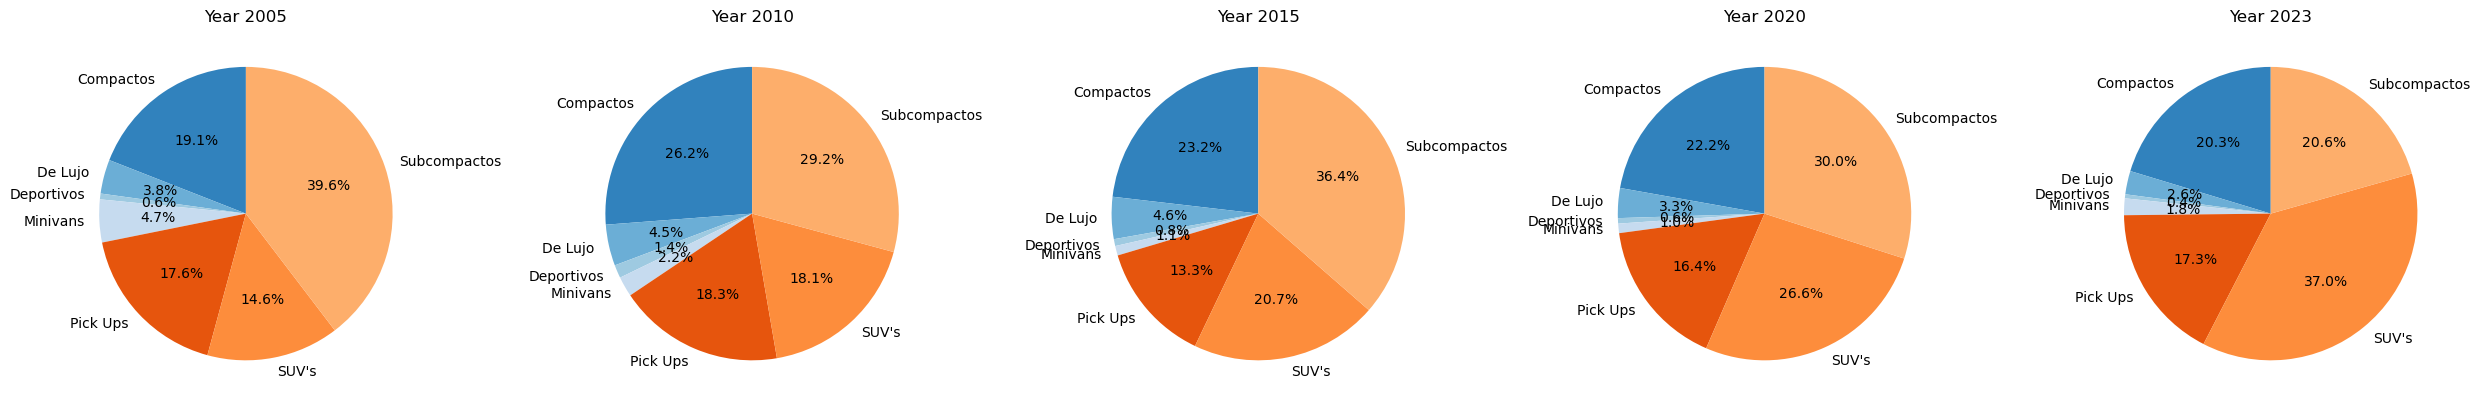

In [302]:
# Create the figure and the axis
plt.figure(figsize=(25, 6))

# Iterate over the years and create pie charts for the volumes
for year, segment_counts_year in count_by_year.items():
    plt.subplot(1, len(interest_years), list(count_by_year.keys()).index(year) + 1)
    plt.pie(segment_counts_year, labels=segment_counts_year.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Year {year}')

# Adjust spaces between the charts
plt.tight_layout()

# Show the charts
plt.show()

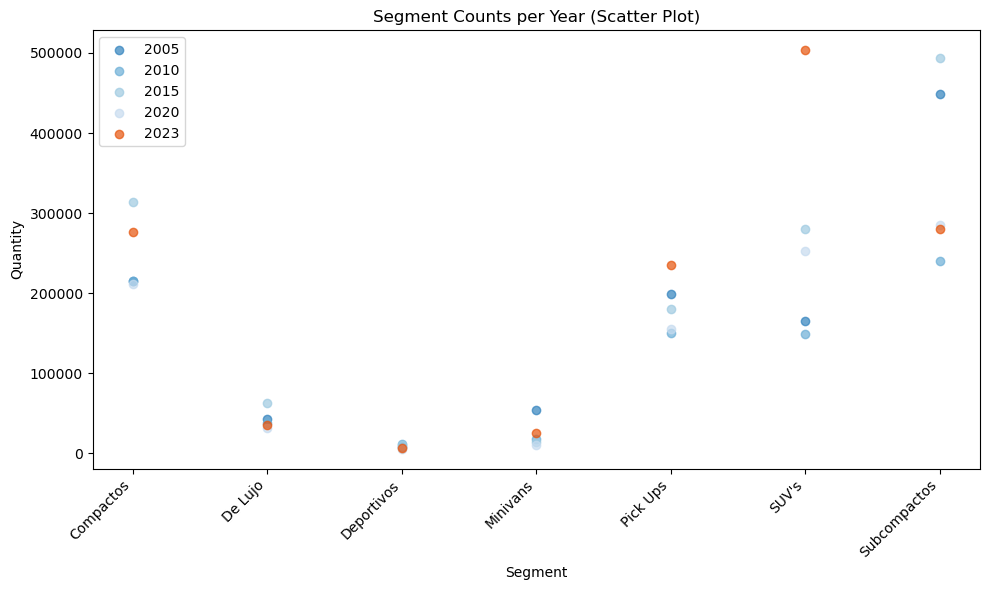

In [303]:
# Create the chart
plt.figure(figsize=(10, 6))

# Iterate over the years and create a scatter plot
for year, segment_counts_year in count_by_year.items():
    plt.scatter(segment_counts_year.index, segment_counts_year.values, label=str(year), alpha=0.7)

# Add title and labels
plt.title('Segment Counts per Year (Scatter Plot)')
plt.xlabel('Segment')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()

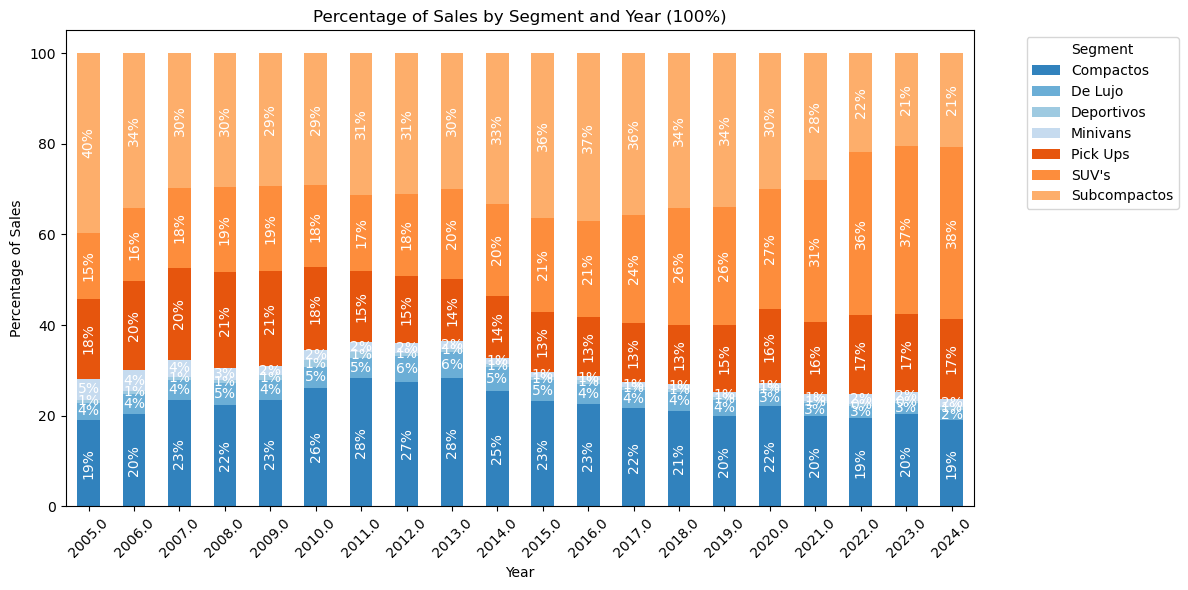

In [304]:
# Calculate total sales per year
sales_per_year = df_CarsMex.groupby('Año')['Cantidad'].sum()

# Group by year and segment, and sum the sales
sales_per_segment_year = df_CarsMex.groupby(['Año', 'Segmento'])['Cantidad'].sum().unstack()

# Calculate the percentage of sales for each segment by year
percentage_sales = sales_per_segment_year.div(sales_per_year, axis=0) * 100

# Plot the bar chart with percentages
ax = percentage_sales.plot(kind='bar', stacked=True, figsize=(12, 6))

# Annotate each bar with its percentage
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height < 9:
        ax.annotate('{:.0f}%'.format(height), (x + width / 2, y + height / 2), ha='center', va='center', color='white')
    else:
        ax.annotate('{:.0f}%'.format(height), (x + width / 2, y + height / 2), ha='center', va='center', color='white', rotation='vertical')

plt.title('Percentage of Sales by Segment and Year (100%)')
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.xticks(rotation=45)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [305]:
# Convert the 'Cantidad' column to numeric type
df_CarsMex['Quantity'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce') 

# Drop rows with NaN values in the 'Cantidad' column
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad']) 

# Create a DataFrame with columns for total sales: Year, Quantity
sales_per_year_df = pd.DataFrame(df_CarsMex.groupby(df_CarsMex["Año"])["Cantidad"].sum())
sales_per_year_df.reset_index(drop=False, inplace=True)

# Format 'Quantity' column with commas and no decimals
sales_per_year_df['Año'] = sales_per_year_df['Año'].astype(int)
sales_per_year_df['Cantidad'] = sales_per_year_df['Cantidad'].astype(int)

# Drop the row corresponding to the year 2024
sales_per_year_df = sales_per_year_df.drop(19)
sales_per_year_df

,Año,Cantidad
0,2005,1131768
1,2006,1139736
2,2007,1099890
3,2008,1025544
4,2009,754925
5,2010,820413
6,2011,905893
7,2012,988042
8,2013,1065098
9,2014,1136965


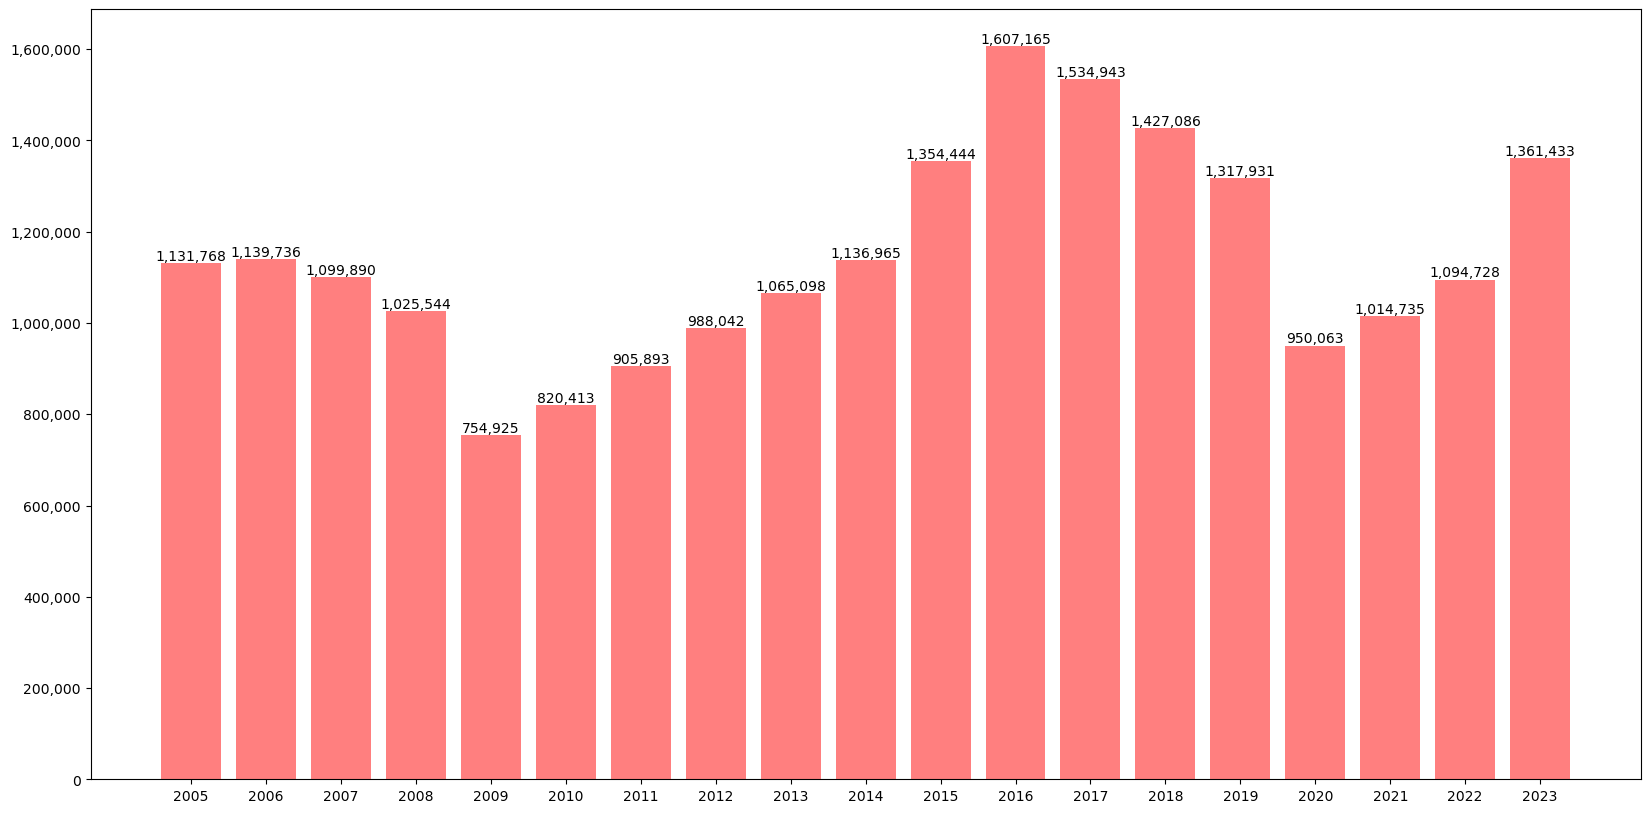

In [307]:
# Set x axis and tick locations
x_axis = np.arange(len(sales_per_year_df))
tick_locations = [value for value in x_axis]
labels = sales_per_year_df["Cantidad"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
bars = plt.bar(x_axis, sales_per_year_df["Cantidad"], color='r', alpha=0.5, align="center")

# Format y-axis labels with comma separator
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Format labels on bars with comma separator
for bar, label in zip(bars, labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(label), ha='center', va='bottom')

plt.xticks(tick_locations, sales_per_year_df["Año"])
plt.show()

In [309]:
# Group the data by brand and sum the sales for each brand
sales_by_brand = df_CarsMex.groupby('Marca')['Cantidad'].sum()

# Sort the sales by brand in descending order
sales_by_brand = sales_by_brand.sort_values(ascending=False)

# Convert the Series into a DataFrame
df_sales_by_brand = sales_by_brand.reset_index()

# Add 1 to the index so it starts from 1
df_sales_by_brand.index += 1

# Rename the sales column
df_sales_by_brand.columns = ['Brand', 'Sales']

# Show the top 5 selling brands
df_sales_by_brand.head(5)

,Brand,Sales
1,Nissan,4822867.0
2,General Motors,3952442.0
3,Volkswagen,2630230.0
4,Ford Motor,1725011.0
5,Chrysler,1560869.0


In [310]:
# Create a dictionary to store DataFrames by year
results_by_year = {}

# Iterate from year 2023 to 2013
for year in range(2023, 2012, -1):
    # Filter the data for the current year
    sales_year = df_CarsMex[df_CarsMex['Año'] == year]
    # Group the filtered data by brand and sum the sales for each brand
    sales_by_brand_year = sales_year.groupby('Marca')['Cantidad'].sum()
    # Sort the sales by brand in descending order
    sales_by_brand_year = sales_by_brand_year.sort_values(ascending=False)
    # Convert the Series into a DataFrame, reset index without dropping the old index
    df_sales_by_brand_year = sales_by_brand_year.reset_index().reset_index(drop=True)
    # Add 1 to the index
    df_sales_by_brand_year.index += 1
    # Rename the sales column
    df_sales_by_brand_year.columns = ['Brand', 'Sales']
    # Add an additional column for the year
    df_sales_by_brand_year['Year'] = year
    # Store the DataFrame in the dictionary
    results_by_year[year] = df_sales_by_brand_year

# Show each DataFrame by year
for year, df in results_by_year.items():
    # Assign each DataFrame to a variable with the corresponding year name
    globals()[f'df_results_{year}'] = df

# Show the created variables
df_results_2023

,Brand,Sales,Year
1,Nissan,241056.0,2023
2,General Motors,184051.0,2023
3,Volkswagen,113975.0,2023
4,Toyota,104113.0,2023
5,KIA,93490.0,2023
6,Mazda,76017.0,2023
7,Chrysler,71376.0,2023
8,MG Motor,60128.0,2023
9,Hyundai,49757.0,2023
10,Ford Motor,47968.0,2023


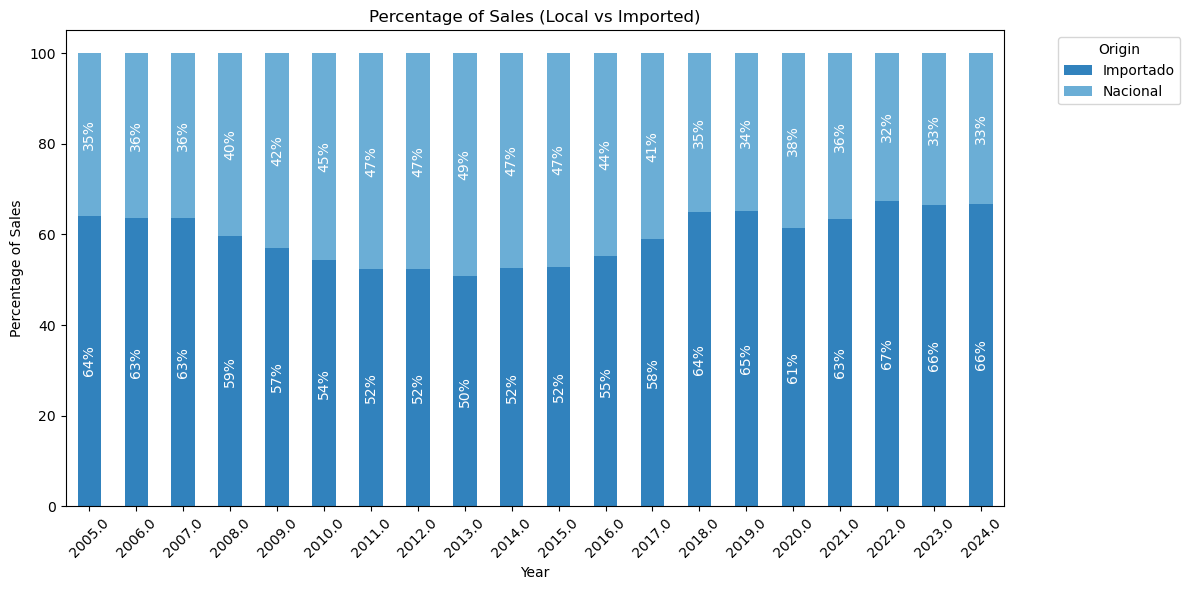

In [313]:
# Group by year and origin, and sum the sales
sales_by_origin_year = df_CarsMex.groupby(['Año', 'Origen'])['Cantidad'].sum().unstack()

# Calculate the total sales per year
total_sales_per_year = sales_by_origin_year.sum(axis=1)

# Calculate the percentage of sales for each origin by year
percentage_sales = sales_by_origin_year.div(total_sales_per_year, axis=0) * 100

# Plot the stacked bar chart
ax = percentage_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Sales (Local vs Imported)')
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.xticks(rotation=45)
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', rotation=90, color='white')

plt.show()

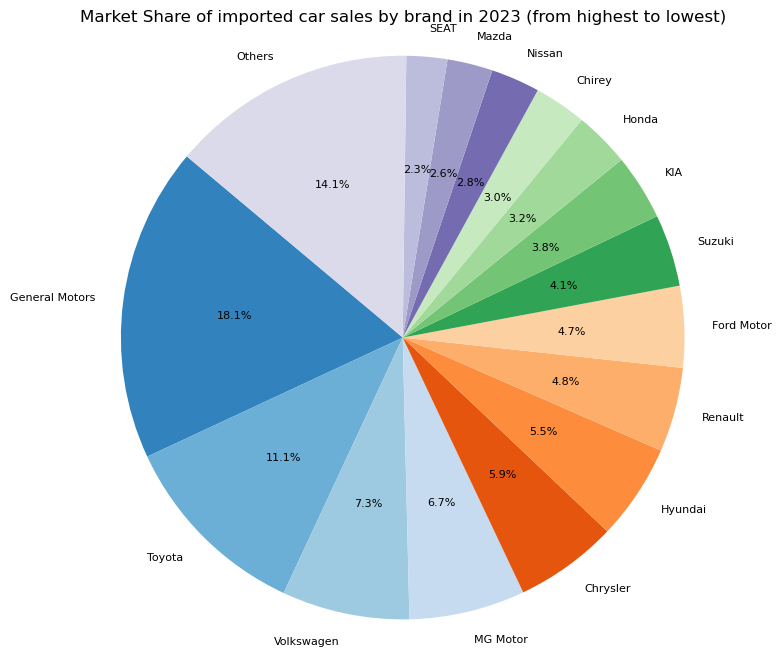

In [317]:
# Filter imported car sales in 2023
imported_car_sales_2023 = df_CarsMex[(df_CarsMex['Origen'] == 'Importado') & (df_CarsMex['Año'] == 2023)]

# Group by brand and sum the sales
sales_by_brand = imported_car_sales_2023.groupby('Marca')['Cantidad'].sum()

# Sort sales by brand from highest to lowest
sales_by_brand_sorted = sales_by_brand.sort_values(ascending=False)

# Filter the main brands and group the rest into "Others"
main_brands = sales_by_brand_sorted.head(15)
others = pd.Series(sales_by_brand_sorted[15:].sum(), index=['Others'])

# Combine the main brands with "Others"
final_sales_by_brand = pd.concat([main_brands, others])

# Create the pie chart with the main brands and "Others"
plt.figure(figsize=(8, 8))
plt.pie(final_sales_by_brand, labels=final_sales_by_brand.index, startangle=140, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Market Share of imported car sales by brand in 2023 (from highest to lowest)')
plt.axis('equal')
plt.show()

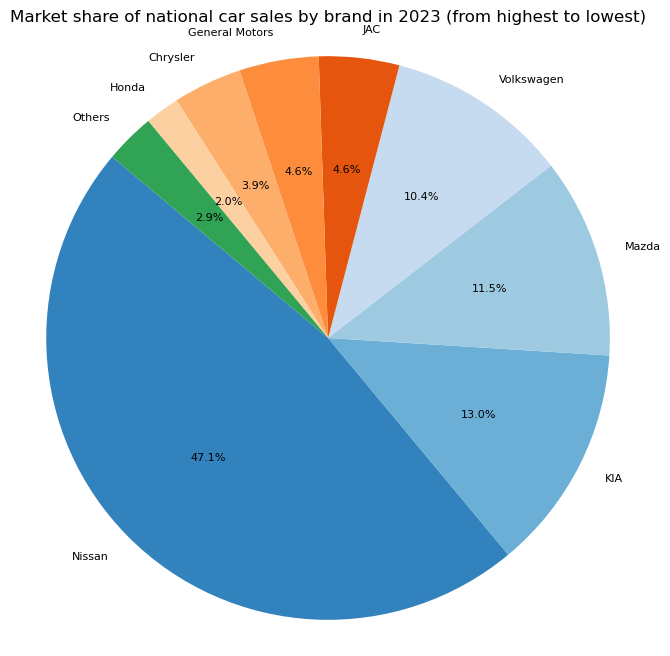

In [318]:
# Filter national car sales in 2023
national_car_sales_2023 = df_CarsMex[(df_CarsMex['Origen'] == 'Nacional') & (df_CarsMex['Año'] == 2023)]

# Group by brand and sum the sales
sales_by_brand_national = national_car_sales_2023.groupby('Marca')['Cantidad'].sum()

# Sort sales by brand from highest to lowest
sales_by_brand_national_sorted = sales_by_brand_national.sort_values(ascending=False)

# Filter the main brands and group the rest into "Others"
main_brands_national = sales_by_brand_national_sorted.head(8)
others_national = pd.Series(sales_by_brand_national_sorted[8:].sum(), index=['Others'])

# Combine the main brands with "Others"
final_sales_by_brand_national = pd.concat([main_brands_national, others_national])

# Create the pie chart with the main brands and "Others" for national cars in 2023
plt.figure(figsize=(8, 8))
plt.pie(final_sales_by_brand_national, labels=final_sales_by_brand_national.index, startangle=140, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Market share of national car sales by brand in 2023 (from highest to lowest)')
plt.axis('equal')
plt.show()

In [319]:
# Grouping by model per year
Quantity_year_model = df_CarsMex.groupby(['Año', 'Modelo', 'País origen'])['Cantidad'].sum()

In [320]:
# Converting the series into a data frame
Quantity_year_model = Quantity_year_model.reset_index()

# Sorting by best-selling model per year
Ord_df = Quantity_year_model.sort_values(by=['Año', 'Cantidad', 'Modelo'], ascending=[True, False, False])

In [326]:
# Step 2: Group the data by year
grouped = Ord_df.groupby('Año')

# Step 3: Apply a function to each group to take the first 5 records and sum the rest
resultados = []
for _, group in grouped:
    top_10 = group.head(19)
    resto = group.iloc[19:]
    suma_resto = pd.DataFrame(resto.sum()).T
    suma_resto['Modelo'] = 'Suma Resto'
    suma_resto['País origen'] = 'Resto'
    suma_resto['Año'] = group.iloc[0]['Año']
    top_10_and_suma_resto = pd.concat([top_10, suma_resto], ignore_index=True)
    resultados.append(top_10_and_suma_resto)

# Step 4: Concatenate the results into a new DataFrame
new_df = pd.concat(resultados, ignore_index=True)

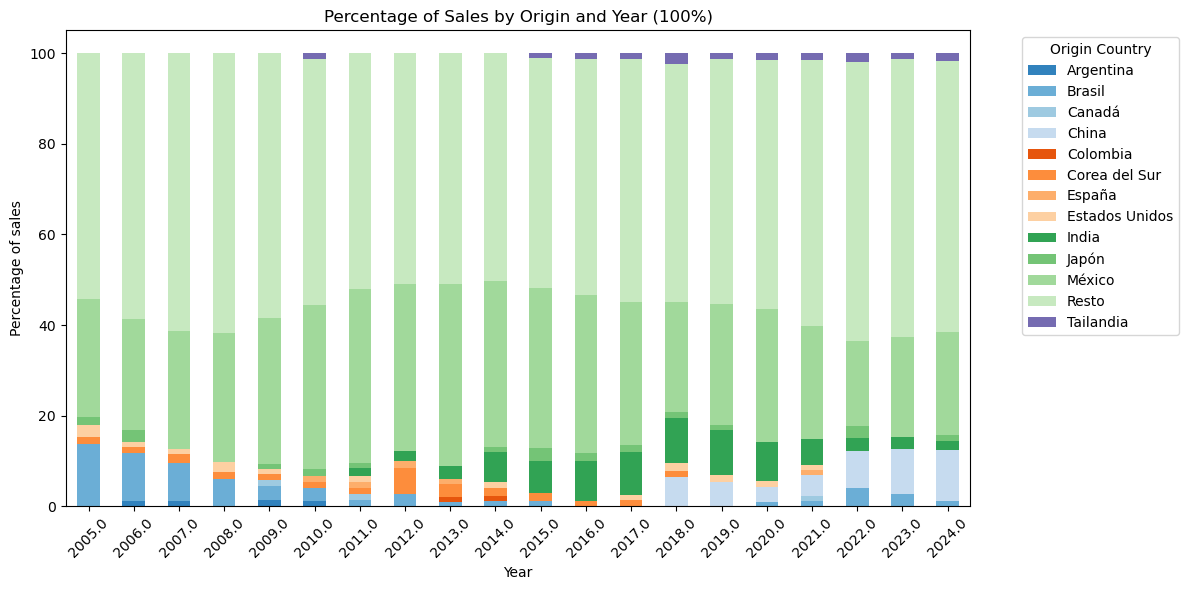

In [328]:
# Group by year and origin country, and sum the sales
sales_by_origin_year = new_df.groupby(['Año', 'País origen'])['Cantidad'].sum().unstack()

# Calculate the total sales per year
total_sales_per_year = sales_by_origin_year.sum(axis=1)

# Calculate the percentage of sales for each brand per year
percentage_sales = sales_by_origin_year.div(total_sales_per_year, axis=0) * 100

# Plot the 100% stacked bar chart
percentage_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Sales by Origin and Year (100%)')
plt.xlabel('Year')
plt.ylabel('Percentage of sales')
plt.xticks(rotation=45)
plt.legend(title='Origin Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

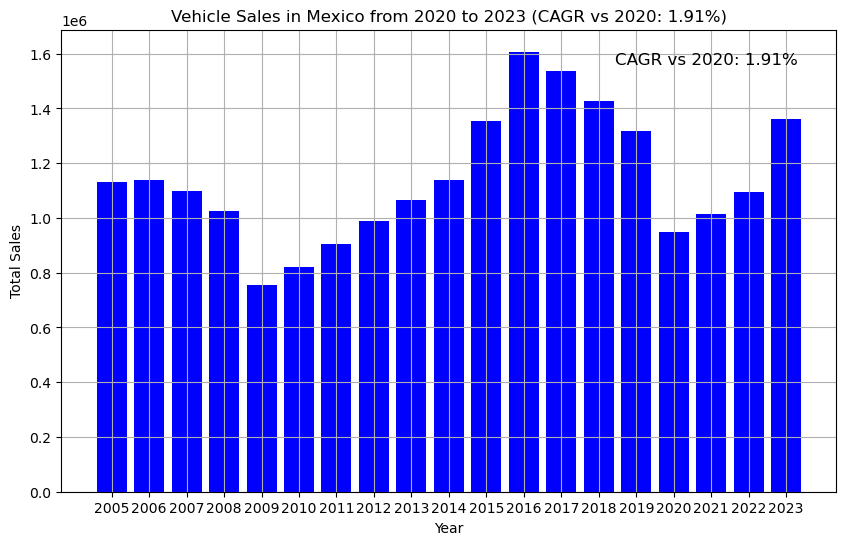

In [332]:
# Remove rows with NaN values in the 'Quantity' column
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad'])

# Convert the year to int type for easier visualization
df_CarsMex['Año'] = df_CarsMex['Año'].astype(int)

# Filter the data up to the year 2023
df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]

# Group the data by year and calculate the total quantity for each year
growth_data = df_CarsMex.groupby('Año')['Cantidad'].sum().reset_index()

# Calculate the Compound Annual Growth Rate (CAGR) with respect to 2020
initial_value = growth_data[growth_data['Año'] == 2020]['Cantidad'].iloc[0]
final_value = growth_data['Cantidad'].iloc[-1]
num_years = growth_data['Año'].iloc[-1] - growth_data['Año'].iloc[0] + 1
cagr = (final_value / initial_value) ** (1 / num_years) - 1

# Plot the vehicle sales quantity over time from 2018 to 2023
plt.figure(figsize=(10, 6))
plt.bar(growth_data['Año'], growth_data['Cantidad'], color='b')
plt.title('Vehicle Sales in Mexico from 2020 to 2023 (CAGR vs 2020: {:.2%})'.format(cagr))
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(growth_data['Año'])  # Ensure that the x-axis ticks are the years

# Add text with the CAGR at the top right of the graph
plt.text(0.95, 0.95, 'CAGR vs 2020: {:.2%}'.format(cagr), transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

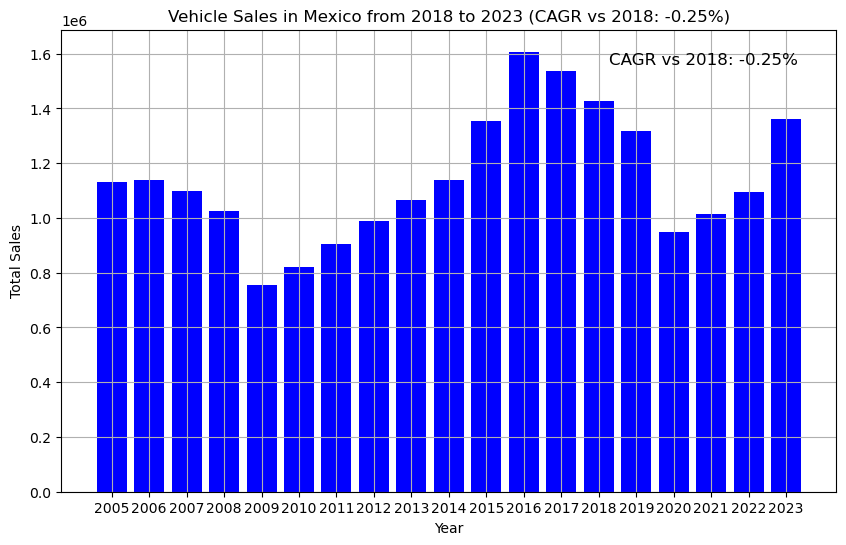

In [337]:
# Filter the data up to the year 2023
df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]

# Group the data by year and calculate the total quantity for each year
growth_data = df_CarsMex.groupby('Año')['Cantidad'].sum().reset_index()

# Calculate the Compound Annual Growth Rate (CAGR) with respect to 2018
initial_value = growth_data[growth_data['Año'] == 2018]['Cantidad'].iloc[0]
final_value = growth_data['Cantidad'].iloc[-1]
num_years = growth_data['Año'].iloc[-1] - growth_data['Año'].iloc[0] + 1
cagr = (final_value / initial_value) ** (1 / num_years) - 1

# Plot the vehicle sales quantity over time from 2018 to 2023
plt.figure(figsize=(10, 6))
plt.bar(growth_data['Año'], growth_data['Cantidad'], color='b')
plt.title('Vehicle Sales in Mexico from 2018 to 2023 (CAGR vs 2018: {:.2%})'.format(cagr))
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(growth_data['Año'])  # Ensure that the x-axis ticks are the years

# Add text with the CAGR at the top right of the graph
plt.text(0.95, 0.95, 'CAGR vs 2018: {:.2%}'.format(cagr), transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

In [341]:
# Group the data by year and calculate summary statistics for each year
statistics_by_year = df_CarsMex.groupby('Año')['Cantidad'].describe()
statistics_by_year['Total Count'] = df_CarsMex.groupby(['Año'])['Cantidad'].sum()

# Display the table of statistics
print(statistics_by_year)

# Group the data by year and calculate summary statistics for each year
statistics_by_year = df_CarsMex.groupby('Año')['Cantidad'].describe()
statistics_by_year['Total Count'] = df_CarsMex.groupby(['Año'])['Cantidad'].sum()

# Display the table of statistics
print(statistics_by_year)


       count        mean         std    min   25%   50%     75%      max  \
Año                                                                        
2005  3889.0  291.017742  638.771774   -9.0  13.0  65.0  269.00   9561.0   
2006  4054.0  281.138629  567.171393  -13.0  15.0  69.0  306.00   7431.0   
2007  4620.0  238.071429  496.322199  -14.0  14.0  53.0  245.25   6571.0   
2008  4916.0  208.613507  470.327392   -6.0  11.0  46.0  194.00   6755.0   
2009  4875.0  154.856410  376.134266  -47.0   7.0  31.0  140.00   6161.0   
2010  4612.0  177.886600  464.443696 -114.0   7.0  33.0  149.00   7250.0   
2011  4365.0  207.535624  533.015779  -14.0   8.0  39.0  174.00   5446.0   
2012  3967.0  249.065289  594.510180  -15.0  12.0  54.0  219.50   7982.0   
2013  4095.0  260.097192  625.560582   -1.0  11.0  54.0  230.00   8707.0   
2014  4130.0  275.294189  651.976833   -3.0  11.0  59.0  251.00   7744.0   
2015  4121.0  328.668770  778.136635   -1.0  14.0  73.0  293.00  10145.0   
2016  4134.0

                  Total Count
País origen Año              
Brasil      2005     219941.0
            2006     180652.0
            2007     137302.0
            2008     107568.0
            2009      67905.0
...                       ...
Other       2019     223333.0
            2020     158073.0
            2021     190837.0
            2022     200249.0
            2023     227787.0

[143 rows x 1 columns]


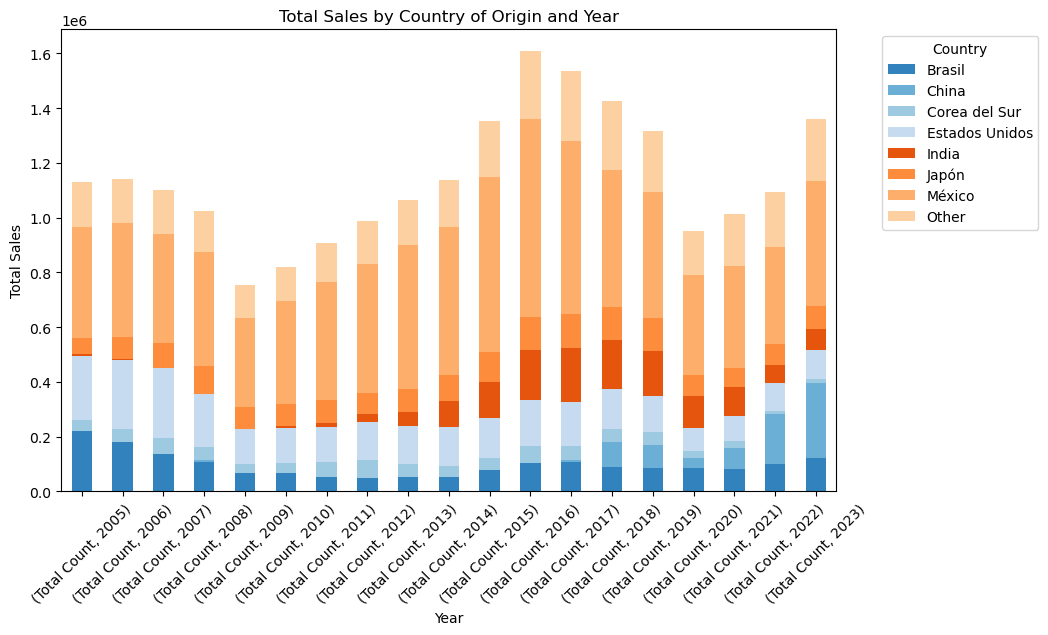

In [345]:
# Group the data by origin country and calculate the total sales for each country
total_sales_by_country = df_CarsMex.groupby('País origen')['Cantidad'].sum()

# Calculate the percentage of total sales for each country
total_sales_percentage = total_sales_by_country / total_sales_by_country.sum()

# Identify the countries with total sales less than 5% of the total market
other_countries = total_sales_percentage[total_sales_percentage < 0.0335].index

# Replace the country names with 'Other' for those countries
df_CarsMex['País origen'] = df_CarsMex['País origen'].apply(lambda x: 'Other' if x in other_countries else x)

# Create an empty DataFrame to store the sum total count for each group (country and year)
sum_country_year = pd.DataFrame()

# Calculate the sum total count for each group and add it as a new column
sum_country_year['Total Count'] = df_CarsMex.groupby(['País origen', 'Año'])['Cantidad'].sum()

# Display the updated table of statistics
print(sum_country_year)

# Unstack the data to create a stacked DataFrame
stacked_data = sum_country_year.unstack(level='Año')

# Transpose the DataFrame
stacked_data_transposed = stacked_data.T

# Plot the stacked bar chart
stacked_data_transposed.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sales by Country of Origin and Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

        País origen   Año  Quantity Growth
13           Brasil  2018              NaN
14           Brasil  2019        -1.564228
15           Brasil  2020        -2.973164
16           Brasil  2021        -3.953588
17           Brasil  2022        23.135720
18           Brasil  2023        21.854151
24            China  2018              NaN
25            China  2019        -9.848477
26            China  2020       -53.567041
27            China  2021       103.016891
28            China  2022       128.358602
29            China  2023        50.116596
43    Corea del Sur  2018              NaN
44    Corea del Sur  2019         0.711469
45    Corea del Sur  2020       -46.350753
46    Corea del Sur  2021       -12.406298
47    Corea del Sur  2022       -42.839031
48    Corea del Sur  2023        26.623891
62   Estados Unidos  2018              NaN
63   Estados Unidos  2019       -12.007071
64   Estados Unidos  2020       -35.150354
65   Estados Unidos  2021        10.952039
66   Estado

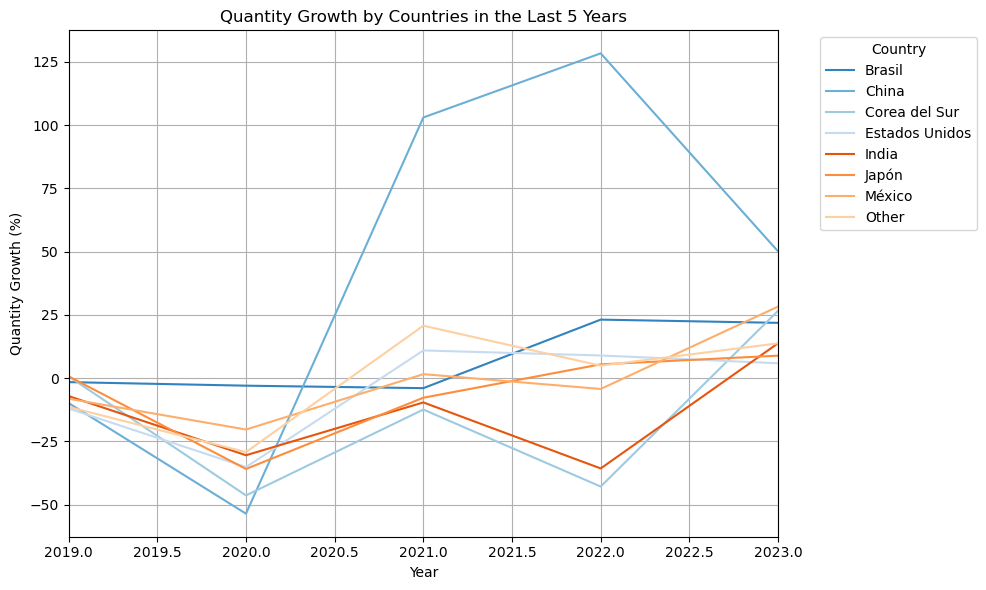

In [350]:
# Filter the data to include only the last 5 years
last_5_years_data = sum_country_year.reset_index().loc[sum_country_year.reset_index()['Año'] >= 2018]

# Calculate the quantity growth percentage for each country in the last 5 years
country_growth_last_5_years = last_5_years_data.groupby('País origen')['Total Count'].pct_change() * 100

# Create a DataFrame with quantity growth by country in the last 5 years
country_growth_df = pd.DataFrame({
    'País origen': last_5_years_data['País origen'],
    'Año': last_5_years_data['Año'],
    'Quantity Growth': country_growth_last_5_years
})

# Print the DataFrame
print(country_growth_df)

# Get a list of unique countries to assign a color to each one
unique_countries = country_growth_df['País origen'].unique()

# Create the figure and the axes
plt.figure(figsize=(10, 6))

# Plot the quantity growth by country in the last 5 years
for i, country in enumerate(unique_countries):
    country_data = country_growth_df[country_growth_df['País origen'] == country]
    plt.plot(country_data['Año'], country_data['Quantity Growth'], label=country)

# Add title and axis labels
plt.title('Quantity Growth by Countries in the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Quantity Growth (%)')

# Show the legend with the countries and adjust the position
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the x-axis limits to correctly display the years
plt.xlim(2019, country_growth_df['Año'].max())

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

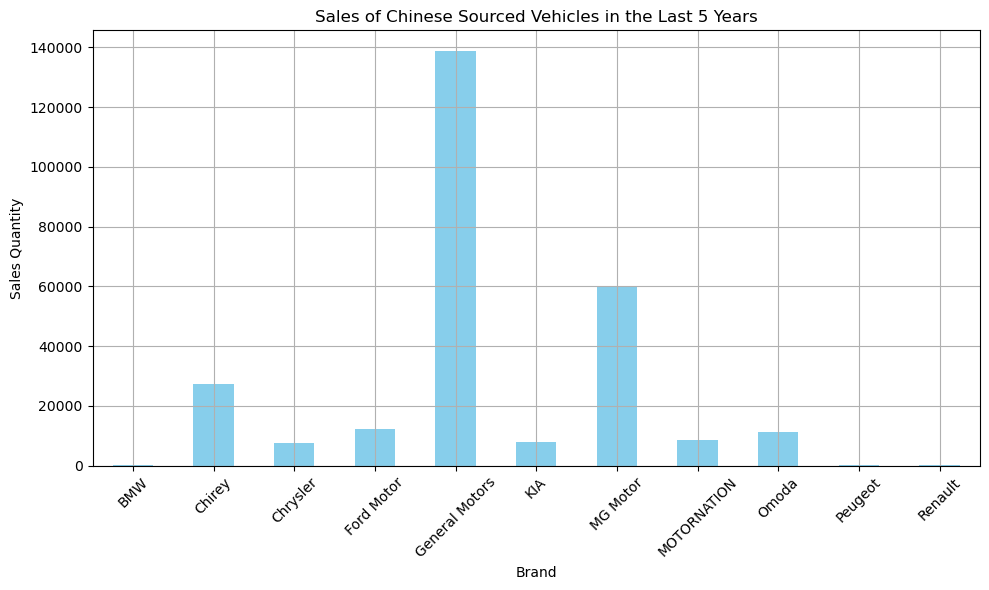

In [359]:
# Filter the data to include only the brands from China and the last 5 years
china_brands_data_last_5_years = df_CarsMex[(df_CarsMex['País origen'] == 'China') & (df_CarsMex['Año'] >= 2023)]

# Calculate the sales quantity per brand
china_brands_sales_last_5_years = china_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
china_brands_sales_last_5_years.plot(kind='bar', color='skyblue')
plt.title('Sales of Chinese Sourced Vehicles in the Last 5 Years')
plt.xlabel('Brand')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

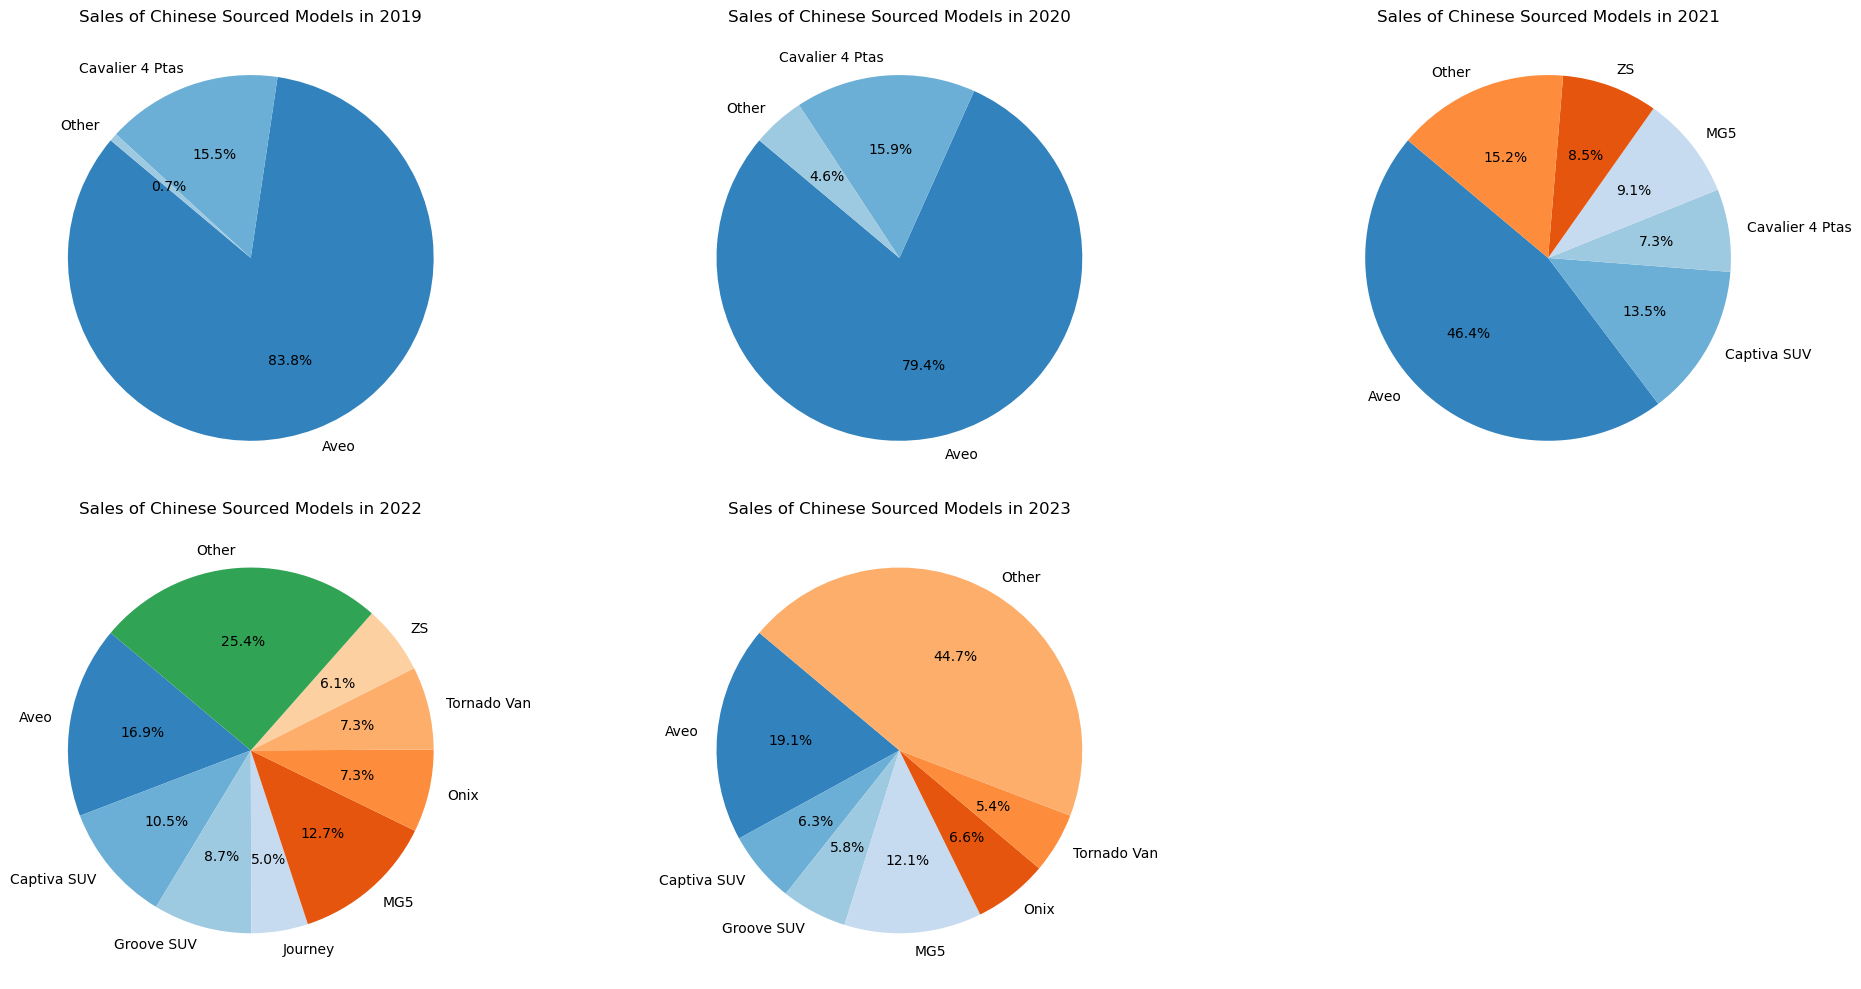

In [361]:
# Create a list to store the pie charts
plt.figure(figsize=(20, 10))

# Iterate over the years
for i, year in enumerate(range(2019, 2024)):
    # Filter the data for the current year
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    
    # Filter the data to include only the models from China
    china_models_data = year_data[year_data['País origen'] == 'China']
    
    # Calculate the total sales quantity for the current year
    total_sales = china_models_data['Cantidad'].sum()
    
    # Calculate the percentage of sales for each model
    model_sales_percentage = (china_models_data.groupby('Modelo')['Cantidad'].sum() / total_sales) * 100
    
    # Filter the models representing less than 5% of the sales and group them into 'Other'
    other_models_percentage = model_sales_percentage[model_sales_percentage < 5].sum()
    model_sales_percentage = model_sales_percentage[model_sales_percentage >= 5]
    model_sales_percentage['Other'] = other_models_percentage
    
    # Create the pie chart for the current year
    plt.subplot(2, 3, i+1)
    plt.pie(model_sales_percentage, labels=model_sales_percentage.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sales of Chinese Sourced Models in {year}')
plt.tight_layout()
plt.show()

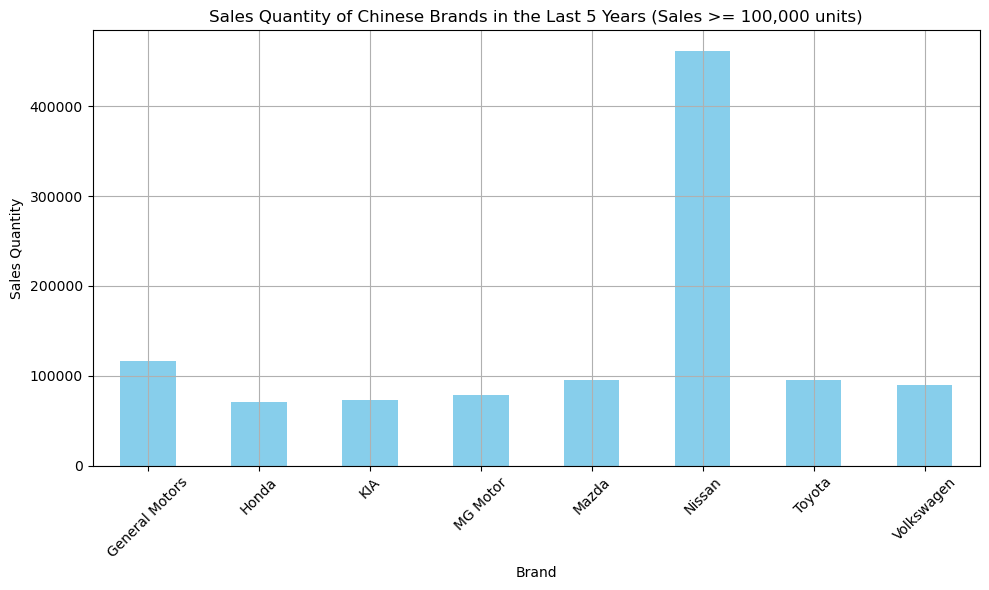

In [365]:
# Filter the data to include only Compact segment brands and the last 5 years
compact_brands_data_last_5_years = df_CarsMex[(df_CarsMex['Segmento'] == 'Compactos') & (df_CarsMex['Año'] >= 2019)]

# Calculate the sales quantity per brand
compact_brands_sales_last_5_years = compact_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()

# Filter the brands with a quantity greater than or equal to 50,000 units
compact_brands_sales_last_5_years_filtered = compact_brands_sales_last_5_years[compact_brands_sales_last_5_years >= 50000]

# Create the bar chart
plt.figure(figsize=(10, 6))
compact_brands_sales_last_5_years_filtered.plot(kind='bar', color='skyblue')
plt.title('Sales Quantity of Chinese Brands in the Last 5 Years (Sales >= 100,000 units)')
plt.xlabel('Brand')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

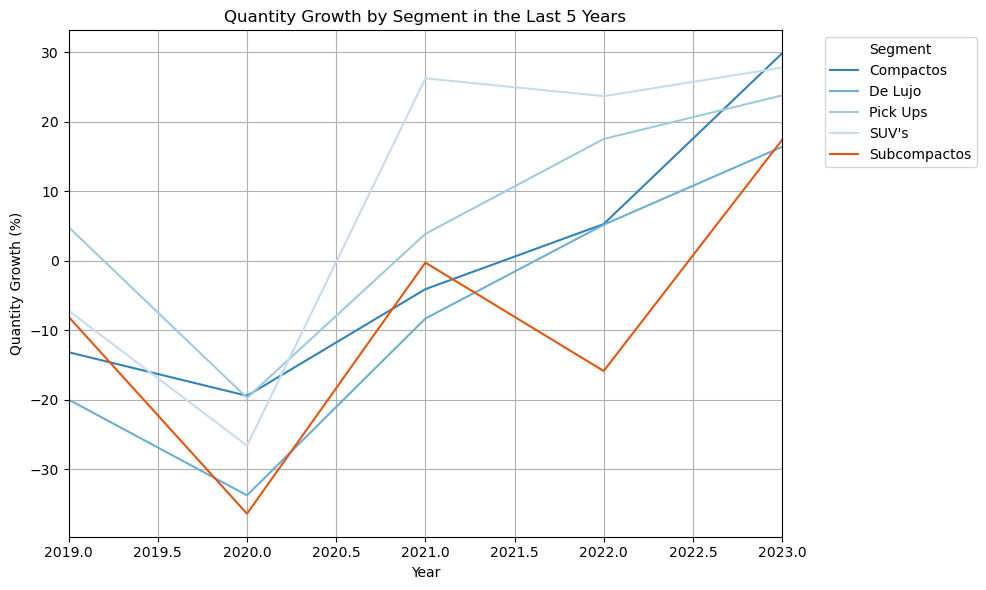

In [369]:
# Calculate total sales by segment
total_sales_by_segment = df_CarsMex.groupby('Segmento')['Cantidad'].sum()

# Calculate the percentage of total sales for each segment
total_sales_segment_percentage = total_sales_by_segment / total_sales_by_segment.sum()

# Identify segments with total sales less than 3.35% of the total market
other_segments = total_sales_segment_percentage[total_sales_segment_percentage < 0.0335].index

# Replace segment names with 'Other' for those with total sales less than 3.35%
df_CarsMex['Segmento'] = df_CarsMex['Segmento'].apply(lambda x: 'Other' if x in other_segments else x)

# Create an empty DataFrame to store the sum total count for each group (segment and year)
sum_segment_year = pd.DataFrame()

# Calculate the sum total count for each group and add it as a new column
sum_segment_year['Total Count'] = df_CarsMex.groupby(['Segmento', 'Año'])['Cantidad'].sum()

# Filter the data to include only the last 5 years
last_5_years_data_segment = sum_segment_year.reset_index().loc[sum_segment_year.reset_index()['Año'] >= 2018]

# Calculate the quantity growth percentage for each segment in the last 5 years
segment_growth_last_5_years = last_5_years_data_segment.groupby('Segmento')['Total Count'].pct_change() * 100

# Create a DataFrame with the quantity growth per segment in the last 5 years
segment_growth_df = pd.DataFrame({
    'Segmento': last_5_years_data_segment['Segmento'],
    'Año': last_5_years_data_segment['Año'],
    'Quantity Growth': segment_growth_last_5_years
})

# Get a list of unique segments to assign a color to each one
unique_segments = segment_growth_df['Segmento'].unique()

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot the quantity growth per segment in the last 5 years
for segment in unique_segments:
    if segment != 'Other':  # Exclude 'Other' category
        segment_data = segment_growth_df[segment_growth_df['Segmento'] == segment]
        plt.plot(segment_data['Año'], segment_data['Quantity Growth'], label=segment)

# Add title and axis labels
plt.title('Quantity Growth by Segment in the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Quantity Growth (%)')

# Show the legend with segments and adjust the position
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the x-axis limits to correctly display the years
plt.xlim(2019, segment_growth_df['Año'].max())

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

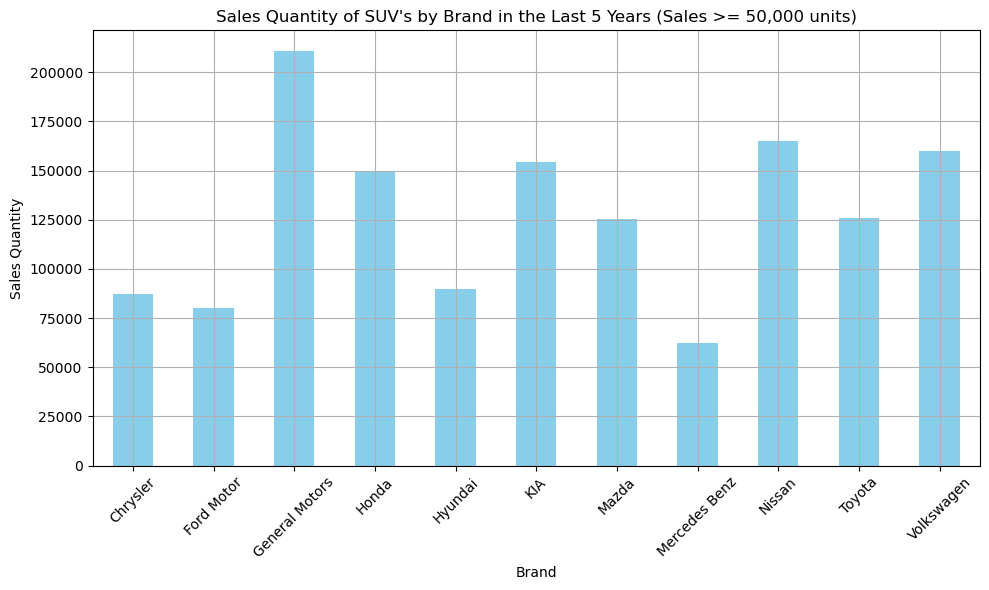

In [371]:
# Filter the data to include only China brands and the last 5 years
SUV_brands_data_last_5_years = df_CarsMex[(df_CarsMex['Segmento'] == "SUV's") & (df_CarsMex['Año'] >= 2019)]

# Calculate the sales quantity per brand
SUV_brands_data_last_5_years = SUV_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()

# Filter brands with sales less than 50,000 units
SUV_brands_data_last_5_years_filtered = SUV_brands_data_last_5_years[SUV_brands_data_last_5_years >= 50000]

# Create the bar chart
plt.figure(figsize=(10, 6))
SUV_brands_data_last_5_years_filtered.plot(kind='bar', color='skyblue')
plt.title("Sales Quantity of SUV's by Brand in the Last 5 Years (Sales >= 50,000 units)")
plt.xlabel('Brand')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

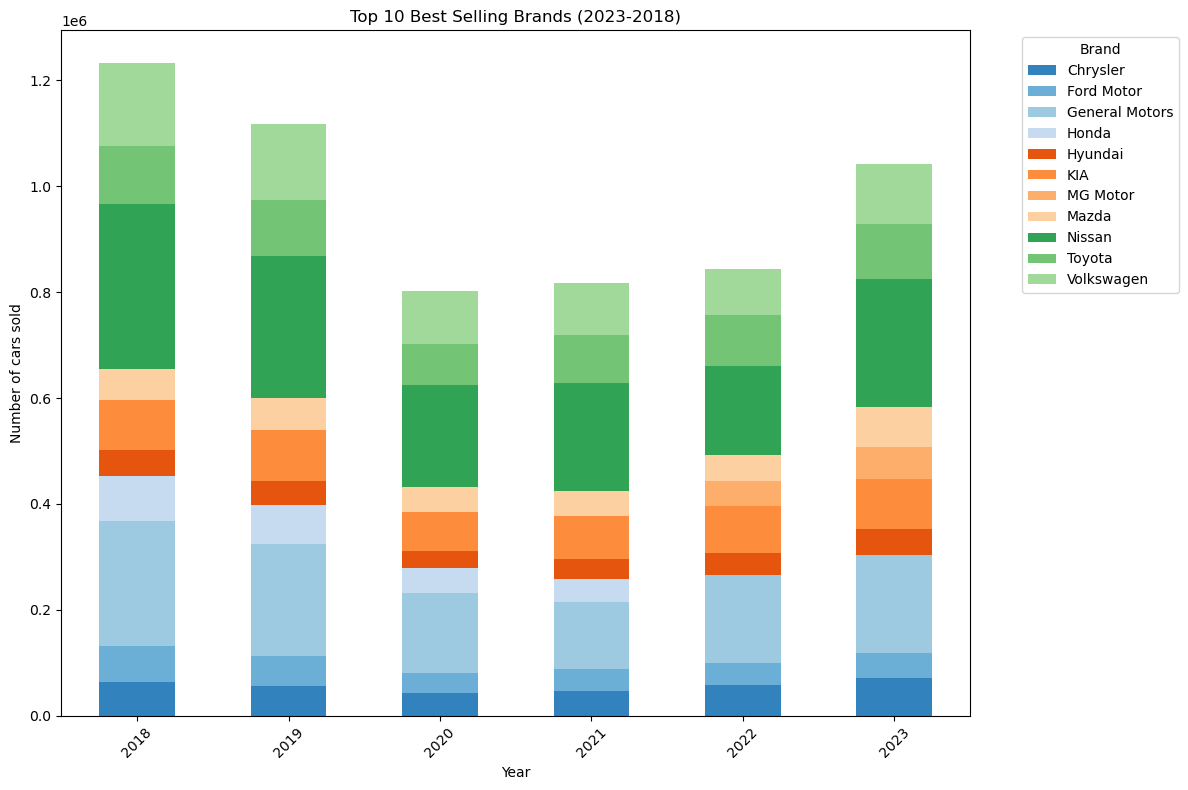

In [373]:
# Create a dictionary to store the sales of the top 10 brands per year
sales_by_year = {}

# Iterate over the years from 2023 to 2018
for year in range(2023, 2017, -1):
    # Filter the data for the current year
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    # Group by brand and sum the sales for the current year
    sales_by_brand_year = year_data.groupby('Marca')['Cantidad'].sum().nlargest(10)
    # Store the sales by brand for the current year in the dictionary
    sales_by_year[year] = sales_by_brand_year

# Create a DataFrame with the sales of the top 10 brands for each year
df_sales_stacked = pd.DataFrame(sales_by_year)

# Transpose the DataFrame to have years as index and brands as columns
df_sales_stacked = df_sales_stacked.T

# Reverse the order of rows in the DataFrame
df_sales_stacked = df_sales_stacked.iloc[::-1]

# Create a stacked bar chart with the new order of rows
df_sales_stacked.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Number of cars sold')
plt.title('Top 10 Best Selling Brands (2023-2018)')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

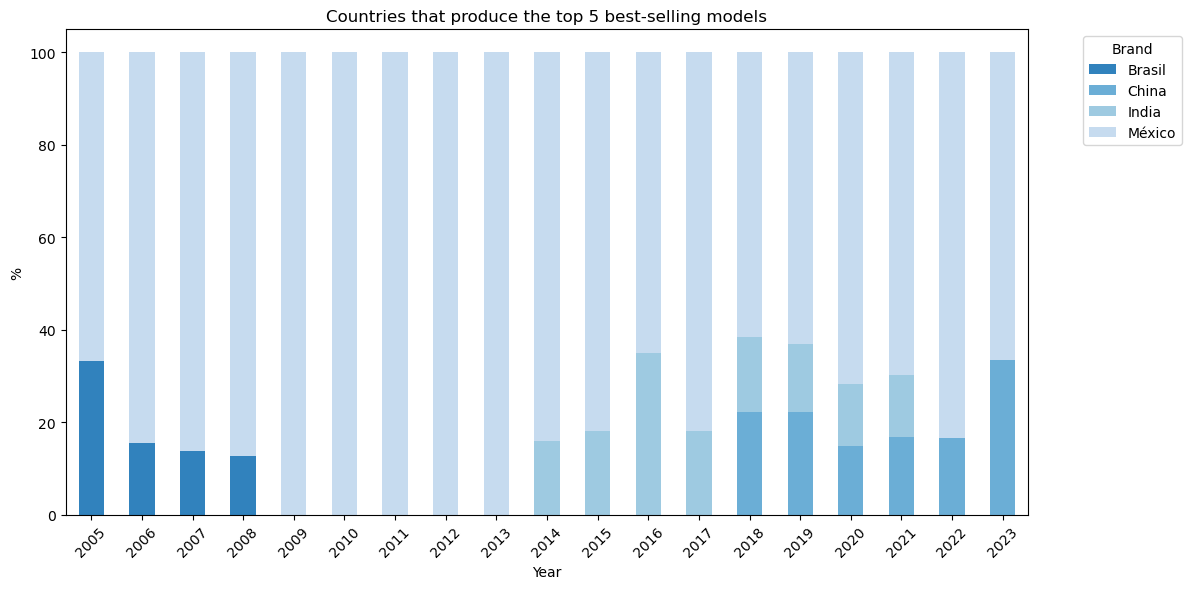

In [376]:
# Grouping by year, model, and country of origin
quantity_year_model = df_CarsMex.groupby(['Año', 'Modelo', 'País origen'])['Cantidad'].sum()

# Converting the series into a DataFrame
quantity_year_model = quantity_year_model.reset_index()

# Sorting by the top-selling model for each year
ord_df = quantity_year_model.sort_values(by=['Año', 'Cantidad', 'Modelo'], ascending=[True, False, False])

# Step 2: Group the data by year
grouped = ord_df.groupby('Año')

# Step 3: Apply a function to each group to take the top 5 records and sum the rest
results = []
for _, group in grouped:
    top_5 = group.head(5)
    results.append(top_5)

# Step 4: Concatenate the results into a new DataFrame
new_df = pd.concat(results, ignore_index=True)

# Group by year and country of origin, and sum the sales
sales_by_origin_year = new_df.groupby(['Año', 'País origen'])['Cantidad'].sum().unstack()

# Calculate the total sales per year
total_sales_year = sales_by_origin_year.sum(axis=1)

# Calculate the percentage of sales for each country of origin by year
percentage_sales = sales_by_origin_year.div(total_sales_year, axis=0) * 100

# Plot the 100% stacked bar chart
percentage_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
palette = "tab20c"
sns.set_palette(palette)
plt.title('Countries that produce the top 5 best-selling models')
plt.xlabel('Year')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

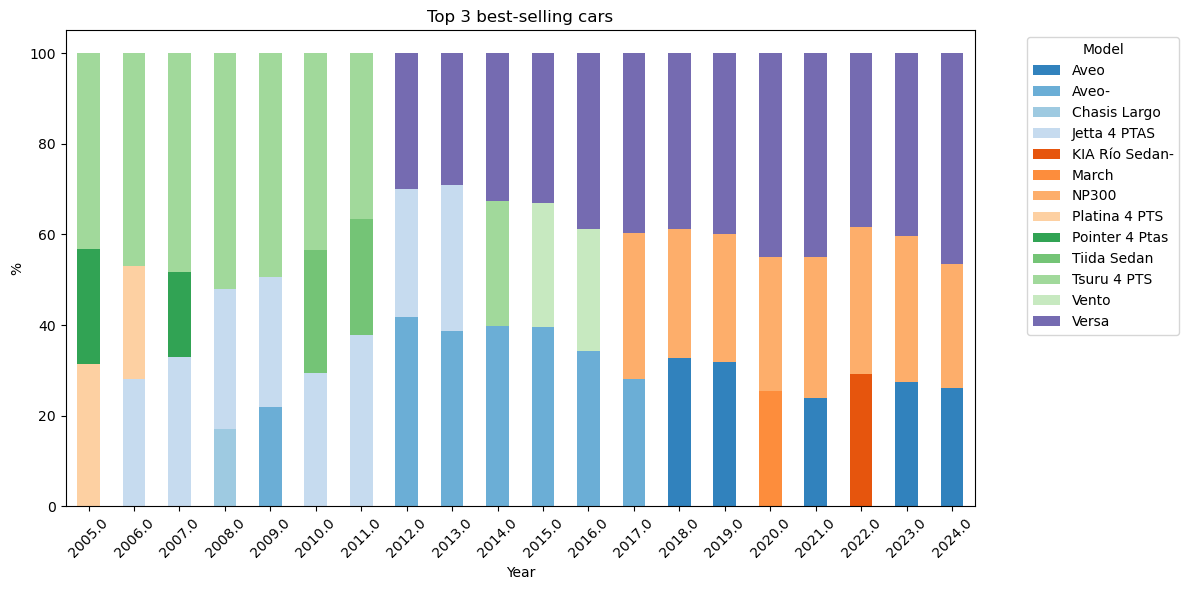

In [377]:
# Step 2: Group the data by year
grouped = Ord_df.groupby('Año')

# Step 3: Apply a function to each group to take the top 5 records and sum the rest
results = []
for _, group in grouped:
    top_3 = group.head(3)
    results.append(top_3)

# Step 4: Concatenate the results into a new DataFrame
new_df = pd.concat(results, ignore_index=True)

# Step 2: Group the data by year
grouped = Ord_df.groupby('Año')

# Step 3: Apply a function to each group to take the top 10 records and sum the rest
results = []
for _, group in grouped:
    top_10 = group.head(3)
    results.append(top_10)

# Step 4: Concatenate the results into a new DataFrame
new_df = pd.concat(results, ignore_index=True)

# Group by year and model, and sum the sales
sales_by_year_model = new_df.groupby(['Año', 'Modelo'])['Cantidad'].sum().unstack()

# Calculate the total sales per year
total_sales_per_year = sales_by_year_model.sum(axis=1)

# Calculate the percentage of sales for each model per year
percentage_sales = sales_by_year_model.div(total_sales_per_year, axis=0) * 100

# Plot the 100% stacked bar chart
percentage_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
palette = "tab20c"
sns.set_palette(palette)
plt.title('Top 3 best-selling cars')
plt.xlabel('Year')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

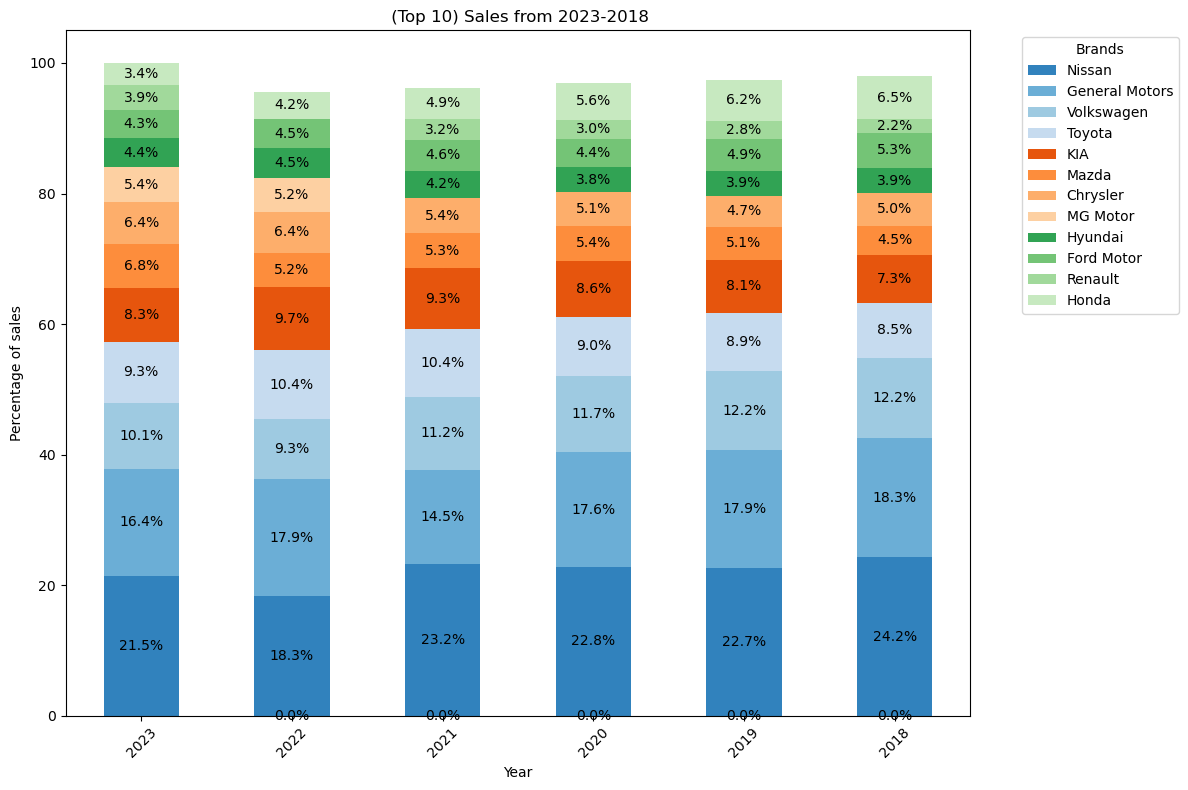

In [378]:
# Create a list of years of interest
years_of_interest = list(range(2023, 2017, -1))

# Create an empty DataFrame to store the sales percentages of the top-selling brands
df_percentage_sales = pd.DataFrame()

# Iterate over the years of interest and calculate the sales percentages for each brand
for year in years_of_interest:
    # Filter the data for the current year
    df_year = df_CarsMex[df_CarsMex['Año'] == year]
    
    # Group by brand and sum the sales for the current year
    sales_by_brand_year = df_year.groupby('Marca')['Cantidad'].sum()
    
    # Get the top 10 selling brands for the current year
    top_brands_year = sales_by_brand_year.nlargest(12)
    
    # Calculate the percentage of sales for each brand
    sales_percentage = (top_brands_year / top_brands_year.sum()) * 100
    
    # Add the sales percentages to the DataFrame
    df_percentage_sales[year] = sales_percentage

# Transpose the DataFrame to have years as index and brands as columns
df_percentage_sales = df_percentage_sales.T

# Create the stacked bar chart
ax = df_percentage_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Percentage of sales')
plt.title(' (Top 10) Sales from 2023-2018')
plt.xticks(rotation=45)
plt.legend(title='Brands', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()